In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Datasets

In [ ]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [ ]:
links = pd.read_csv("links.csv")
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
movies = pd.read_csv("movies_metadata.csv")
movies.head()

<ipython-input-8-3e561a49e211>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("/content/drive/MyDrive/Data science diploma/Final Project/Datasets/movies/movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Data cleaning

### Ratings Dataset

In [ ]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

no missing values in ratings

In [ ]:
ratings[ratings.duplicated()]

,userId,movieId,rating,timestamp


### Movies Dataset

In [ ]:
movies.drop(movies[movies.duplicated()].index, inplace=True)

In [ ]:
movies.isna().sum() / len(movies) * 100

adult                     0.000000
belongs_to_collection    90.112864
budget                    0.000000
genres                    0.000000
homepage                 82.883418
id                        0.000000
imdb_id                   0.037401
original_language         0.024201
original_title            0.000000
overview                  2.098871
popularity                0.011000
poster_path               0.849229
production_companies      0.006600
production_countries      0.006600
release_date              0.191407
revenue                   0.013200
runtime                   0.578620
spoken_languages          0.013200
status                    0.191407
tagline                  55.100873
title                     0.013200
video                     0.013200
vote_average              0.013200
vote_count                0.013200
dtype: float64

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45453 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45453 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45453 non-null  object 
 3   genres                 45453 non-null  object 
 4   homepage               7780 non-null   object 
 5   id                     45453 non-null  object 
 6   imdb_id                45436 non-null  object 
 7   original_language      45442 non-null  object 
 8   original_title         45453 non-null  object 
 9   overview               44499 non-null  object 
 10  popularity             45448 non-null  object 
 11  poster_path            45067 non-null  object 
 12  production_companies   45450 non-null  object 
 13  production_countries   45450 non-null  object 
 14  release_date           45366 non-null  object 
 15  re

Note that :
1.   More than 90% of the data in belongs_to_collection column are missing values
2.   Also about 82% of data in homepage are missing values.
3. More than have of the data in column tagline are missing.
4. Release data should be of type date.
5. Budget and popularity should be of type float
6. adult should be boolean
7. id should be int type to be matching with movieId in ratings df

The best practice for me is to drop belongs_to_collect , homepage and tagline columns.




### Handling datatypes

popularity and budget columns contain string which is incompatible with the definition of the columns. In this case, we can't use astype method , instead I will change it's type manually

In [ ]:
def to_float(x):
  try:
    return float(x)
  except ValueError:
    return np.nan
def to_bool(x):
  try:
    return bool(x)
  except ValueError:
    return np.nan 
def to_int(x):
  try:
    return int(x)
  except ValueError:
    return np.nan 
movies['popularity'] = movies['popularity'].apply(to_float)
movies['budget'] = movies['budget'].apply(to_float)
movies['adult'] = movies['adult'].apply(to_bool)
movies['id'] = movies['id'].apply(to_int)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45453 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45453 non-null  bool   
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45450 non-null  float64
 3   genres                 45453 non-null  object 
 4   homepage               7780 non-null   object 
 5   id                     45450 non-null  float64
 6   imdb_id                45436 non-null  object 
 7   original_language      45442 non-null  object 
 8   original_title         45453 non-null  object 
 9   overview               44499 non-null  object 
 10  popularity             45447 non-null  float64
 11  poster_path            45067 non-null  object 
 12  production_companies   45450 non-null  object 
 13  production_countries   45450 non-null  object 
 14  release_date           45366 non-null  object 
 15  re

### Handling Missing Values

let's check how many rows have budget of zero

In [ ]:
len(movies[movies['budget']==0]) /len(movies) * 100

80.4369348557851

about 80% of column budget have unknown values , so it's better to be dropped

In [ ]:
movies.drop(['belongs_to_collection','homepage','tagline','budget'], axis = 1 , inplace=True)

The remaining columns have missing values but not too much as the previous columns. I will avoid droping rows that have missing values which are common as the IDs of their movies are already used in ratings dataset. Instead I'll handle them by traditional way

there are 17 movies that their imbd_id value is missing. I found out that the imbd_value can be found in the url of the movie in imbd. In that case , I will search by the movie name in imdb and extract its id from the url.

In [ ]:
imdb_missing_id = movies[movies['imdb_id'].isna()].index
movies.iloc[imdb_missing_id]['original_title']

8967                                     Dollman
13761                        L'Aile ou la Cuisse
13825                     Brunet wieczorową porą
17387           Burn Notice: The Fall of Sam Axe
17515                       Count Three and Pray
18964                             My Blue Heaven
19327                           Je, Tu, Il, Elle
20811                                   Grabbers
20942                         Deep in the Valley
21923                                     Maniac
22995                                 Son of God
23753                    Guardians of the Galaxy
33765                                      No. 2
36967                              Il mio domani
40822    Signed, Sealed, Delivered for Christmas
41845                                  Maula Jat
45083                          La fille de Brest
Name: original_title, dtype: object

In [ ]:
imdb_values = ['tt0101704','undefined','tt0065908','tt0818098','tt0176311','tt0490048','','tt1325753','tt0119501','tt0105298','tt0493101','tt15739684','tt4273106','tt1147516','tt0491603','tt4699464','tt6051554']
for idx , value in enumerate(imdb_missing_id):
  movies.at[value,'imdb_id'] = imdb_values[idx]

#### Filling missing values in overview, production companies and production countris column with a string 

In [ ]:
movies['overview'].fillna("No description avaliable" , inplace =True)
movies['production_companies'].fillna("No description avaliable" , inplace =True)
movies['production_countries'].fillna("No description avaliable" , inplace =True)
movies['video'].fillna("No description avaliable" , inplace =True)

#### Using SimpleImputer to fill some columns

In [ ]:
from sklearn.impute import SimpleImputer

## Filling original_language,spoken_languages and status with mode strategy
movies['original_language'] = SimpleImputer(strategy='most_frequent').fit_transform(movies[['original_language']])
movies['status'] = SimpleImputer(strategy='most_frequent').fit_transform(movies[['status']])
movies['spoken_languages'] = SimpleImputer(strategy='most_frequent').fit_transform(movies[['spoken_languages']])

## Filling popularity, revenue with median strategy
movies['popularity'] = SimpleImputer(strategy='median').fit_transform(movies[['popularity']])
movies['revenue'] = SimpleImputer(strategy='median').fit_transform(movies[['revenue']])


#### handling missing values in title

In [ ]:
movies[movies['title'].isna()]

,adult,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
19729,True,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",82663.0,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,1.127513,NaN,No description avaliable,No description avaliable,NaN,0.0,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,No description avaliable,NaN,NaN
19730,True,"[{'name': 'Carousel Productions', 'id': 11176}...",NaN,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1.127513,Midnight Man,False,6.0,1,0.0,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,No description avaliable,NaN,NaN
29502,True,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",122662.0,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,1.127513,NaN,No description avaliable,No description avaliable,NaN,0.0,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,No description avaliable,NaN,NaN
29503,True,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",NaN,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,1.127513,Mardock Scramble: The Third Exhaust,False,7.0,12,0.0,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,No description avaliable,NaN,NaN
35586,True,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",249260.0,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,1.127513,NaN,No description avaliable,No description avaliable,NaN,0.0,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,No description avaliable,NaN,NaN
35587,True,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",NaN,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1.127513,Avalanche Sharks,False,4.3,22,0.0,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,No description avaliable,NaN,NaN


As we can see the values in the previous rows seems to be incompatiable with their columns. As a solution , I will check the whether this movie IDs have been used in ratings dataframe or not. If not, I'll drop this rows 

In [ ]:
movieIDs = movies[movies['title'].isna()]['id'].dropna().values
checks = []
for id in movieIDs:
  temp = len(ratings[ratings['movieId']==id])
  if temp != 0:
    checks.append(temp)
  else:
    checks.append(0)
print(checks)

[0, 0, 0]


now as those IDs haven't been used in ratings dataframe, we now can drop them

In [ ]:
incompatible_rows = movies[movies['title'].isna()].index
movies.drop(incompatible_rows,axis=0,inplace=True)

In [ ]:
movies.isna().sum()

adult                     0
genres                    0
id                        0
imdb_id                   0
original_language         0
original_title            0
overview                  0
popularity                0
poster_path             383
production_companies      0
production_countries      0
release_date             84
revenue                   0
runtime                 257
spoken_languages          0
status                    0
title                     0
video                     0
vote_average              0
vote_count                0
dtype: int64

now we have 3 columns remaining that still contain missing value. I will handle **poster_path** column later as I am gonna change all columns values. For now, I will be handling **release_date** and **runtime** columns by web scrapping imdb.

### Web Scraping

In [ ]:
from bs4 import BeautifulSoup
import requests
needed_headers = {'User-Agent': "Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"}
base_path = "https://www.themoviedb.org/movie/"

#### Scraping runtime

In [ ]:
def get_runtime(id):
  try:
    res = requests.get(base_path + str(id), headers= needed_headers)
    soup = BeautifulSoup(res.content, 'html.parser')
    val = soup.find_all('span',attrs={"class":"runtime"})[0].get_text().strip()
    
    if len(val)==1:
      if 'm' in val[0]:
        minutes = val[0].replace('m','')
        return float(minutes)
      elif 'h' in val[0]:
        hours = val[0].replace('h','')
        minutes = float(hours)*60
        return minutes
    else:
      hours , minutes = val.replace('h','').replace('m','').split(' ')
      total_min = int(hours)*60 + int(minutes)
      return total_min
  except:
    return 0  # Some movies doesn't have runtime description on tmdb website

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="Processing the name column")

In [ ]:
runtime_missing_rows = movies[movies['runtime'].isna()].index

for idx in tqdm(runtime_missing_rows):
  id = movies.loc[idx , 'id']
  total_minutes = get_runtime(id)
  movies.at[idx , 'runtime'] = total_minutes



100%|██████████| 257/257 [01:29<00:00,  2.89it/s]


#### Release column Data scrap

In [ ]:
def get_release_date(id):
  try:
    res = requests.get(base_path + str(id), headers= needed_headers)
    soup = BeautifulSoup(res.content, 'html.parser')
    val = soup.find_all('span',attrs={"class":"release"})[0].get_text().strip().split(' ')
    return val[0].replace('/','-')
  except:
    return 0  # Some movies doesn't have release data description on tmdb website

In [ ]:
release_missing_rows = movies[movies['release_date'].isna()].index

for idx in tqdm(release_missing_rows):
  id = movies.loc[idx , 'id']
  dt = get_release_date(id)
  movies.at[idx , 'release_date'] = dt



100%|██████████| 84/84 [00:27<00:00,  3.06it/s]


#### Poster_path column scraping

after exploring the poster_path column. I found out that the path of most images have been changed so I prefered to reconstruct the column by scraping tmdb page using the movie id.

In [ ]:
def poster_path(id):
  try:
    path =  base_path + str(id)
    res = requests.get(path , headers=needed_headers)
    soup = BeautifulSoup(res.content,'html.parser') 
    img = soup.find_all('img', attrs={'class': 'poster lazyload'})
    new_path = img[0].get("data-srcset").split("1x, ")[-1].split(" ")[0]
    final_path = "https://www.themoviedb.org" + new_path
    print(final_path)
    return final_path
  except:
    return "https://thumbs.dreamstime.com/b/video-camera-icon-cinema-film-movie-vector-eps-195161371.jpg" #path of unknown movie image icon

In [ ]:
! pip install pandarallel

In [ ]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

In [ ]:
movies['poster_path'] = movies['id'].parallel_apply(poster_path)

saving clean dataset to my drive

In [ ]:
movies.to_csv("clean_movies_dataset2.csv")

### Removing duplicated movies

In [ ]:
duplicates = movies[movies.duplicated()].index
movies.drop(duplicates , inplace=True)

### Merge Links and Cleaned Movies Dataset

Movies rated in ratings dataset includes the movie ID in movieslens website while movies_metadata dataset includes information about the movies in their IDs in TMDB website. To be able to retrieve movie rated in rating dataset, I will merge links dataset and cleaned movies dataset to add movielens movie ID along with its metadata.

In [ ]:
df = links.merge(movies , left_on="tmdbId",right_on='id')
df.drop(['Unnamed: 0','imdbId'],axis=1 , inplace=True)

# Save the Dataset to my drive
df.to_csv("merged_movies_IDs.csv")

## EDA

In [ ]:
movies = pd.read_csv("merged_movies_IDs.csv")

#### Which movie has the most revenues?

In [ ]:
res = movies.sort_values(by='revenue',ascending=False)[['original_title','revenue']].iloc[:10]
print(res)

                                     original_title       revenue
14599                                        Avatar  2.787965e+09
26599                  Star Wars: The Force Awakens  2.068224e+09
1645                                        Titanic  1.845034e+09
17868                                  The Avengers  1.519558e+09
25128                                Jurassic World  1.513529e+09
28873                                     Furious 7  1.506249e+09
26602                       Avengers: Age of Ultron  1.405404e+09
17487  Harry Potter and the Deathly Hallows: Part 2  1.342000e+09
22155                                        Frozen  1.274219e+09
42253                          Beauty and the Beast  1.262886e+09


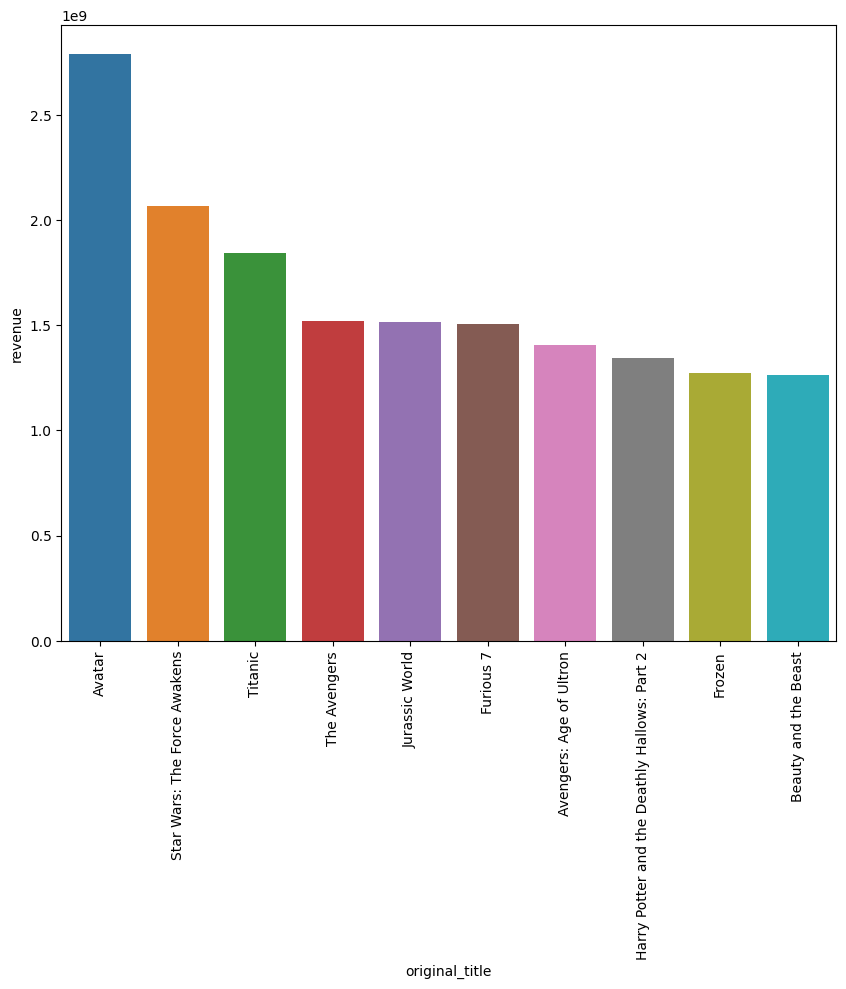

In [ ]:
plt.figure(figsize=[10,8])
sns.barplot(x=res['original_title'],y=res['revenue'])
plt.xticks(rotation=90)
plt.show()

#### Most Rated movies?

In [ ]:
res = movies.sort_values(by='vote_count',ascending=False)[['original_title','revenue']].iloc[:10]
print(res)

                original_title       revenue
15527                Inception  8.255328e+08
12519          The Dark Knight  1.004558e+09
14599                   Avatar  2.787965e+09
17868             The Avengers  1.519558e+09
26608                 Deadpool  7.831130e+08
22923             Interstellar  6.751200e+08
20101         Django Unchained  4.253682e+08
23795  Guardians of the Galaxy  7.733286e+08
2852                Fight Club  1.008538e+08
18294         The Hunger Games  6.912107e+08


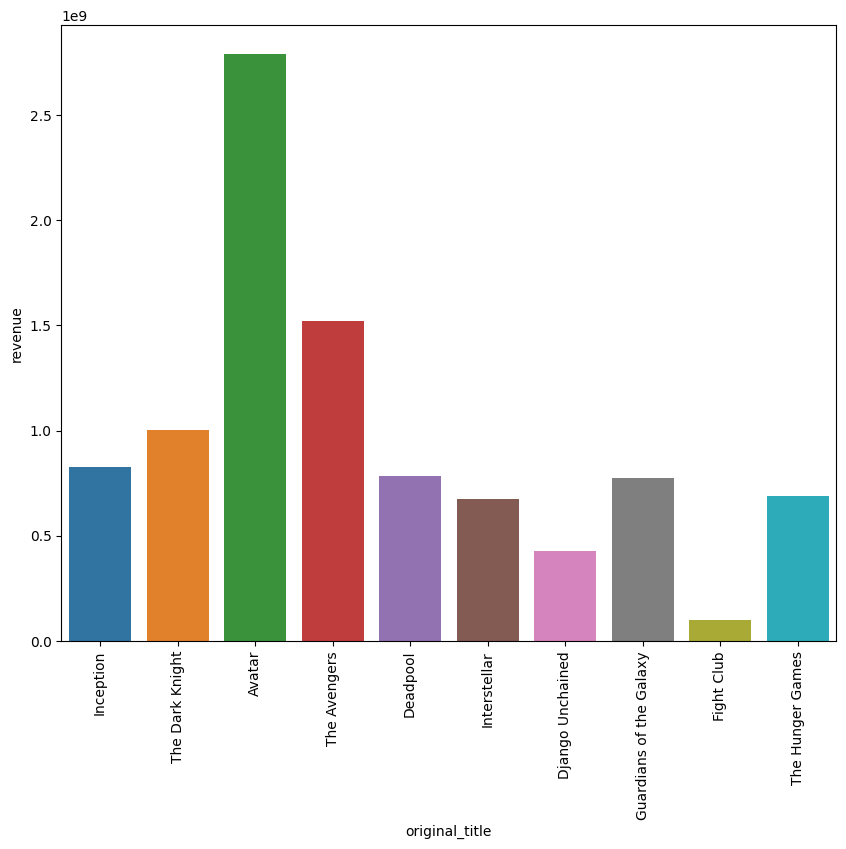

In [ ]:
plt.figure(figsize=[10,8])
sns.barplot(x=res['original_title'],y=res['revenue'])
plt.xticks(rotation=90)
plt.show()


#### relation between runtime and revenue

<Axes: xlabel='runtime', ylabel='revenue'>

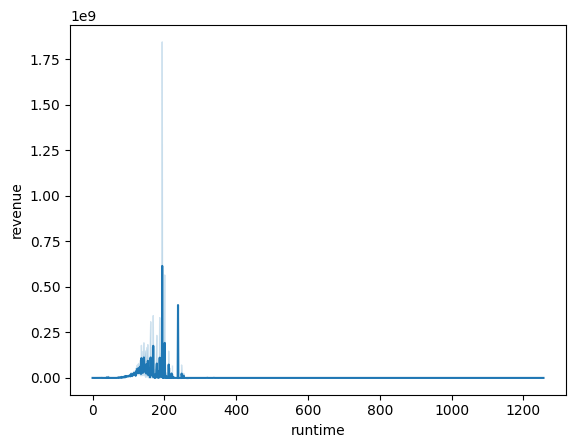

In [ ]:
sns.lineplot(x=movies['runtime'],y= movies['revenue'])

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45494 entries, 0 to 45493
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            45494 non-null  int64  
 1   movieId               45494 non-null  int64  
 2   tmdbId                45494 non-null  float64
 3   adult                 45494 non-null  bool   
 4   genres                45494 non-null  object 
 5   id                    45494 non-null  float64
 6   imdb_id               45493 non-null  object 
 7   original_language     45494 non-null  object 
 8   original_title        45494 non-null  object 
 9   overview              45494 non-null  object 
 10  popularity            45494 non-null  float64
 11  poster_path           45494 non-null  object 
 12  production_companies  45494 non-null  object 
 13  production_countries  45494 non-null  object 
 14  release_date          45494 non-null  object 
 15  revenue            

#### relation between runtime and vote_average

<Axes: xlabel='vote_average', ylabel='runtime'>

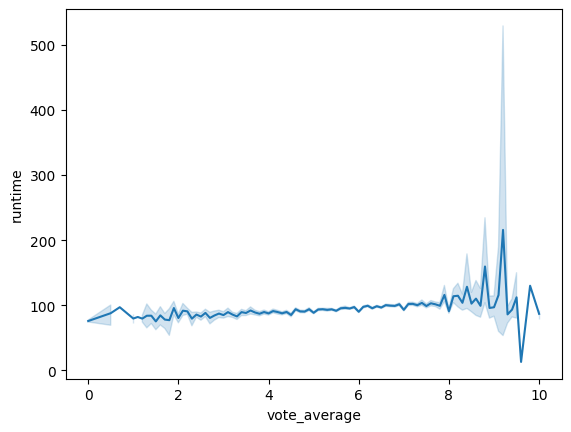

In [ ]:
sns.lineplot(x=movies['vote_average'],y= movies['runtime'])

#### How many movies have been suspended?

In [ ]:
res = movies['status'].value_counts()


Released           45129
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

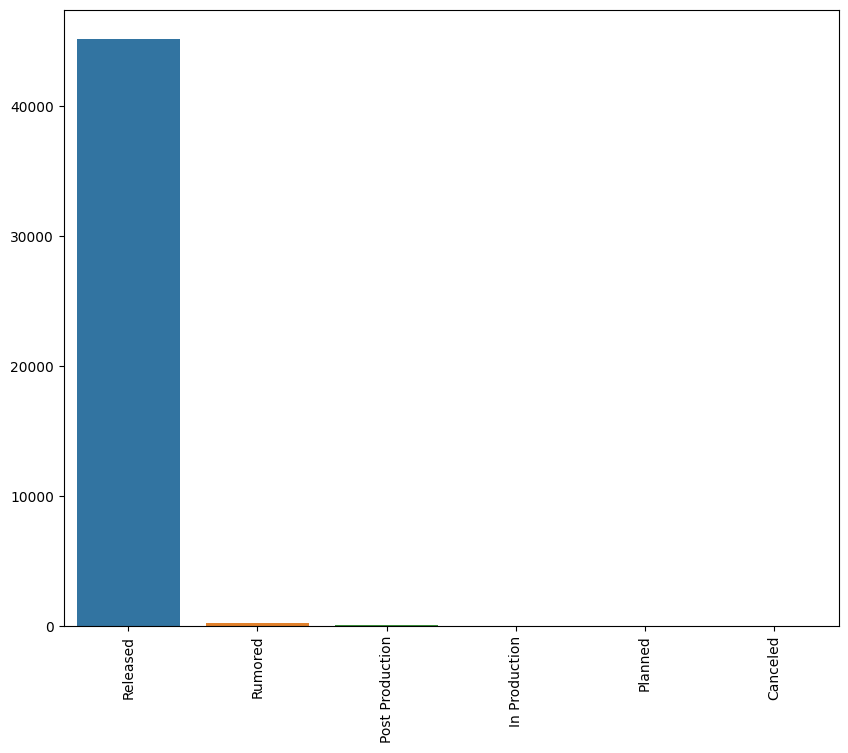

In [ ]:
plt.figure(figsize=[8,8])
sns.barplot(x=res.index,y=res.values)
plt.xticks(rotation=90)
plt.show()


## Data preprocessing

We will be working on rating dataset. We have about 25M rating which is a huge number So to be able to run this locally we will use only about <b> 7% </b> of the ratings samples.

#### Getting 7% of our data randomly

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [ ]:
df = ratings.sample(frac=0.07 , random_state=42)
df.head()

,userId,movieId,rating,timestamp
11928665,123687,163,4.0,1259948252
13042387,135533,55118,4.5,1451620634
70325,741,3499,4.0,1247359351
16382007,170293,2571,3.0,1438244027
21293077,221195,4973,4.0,1465065341


In [ ]:
df.shape

(1821700, 4)

as we can see, timestamp column is in int64 format. So we should transform it into datetime formate.

#### Change timestamp type to datetime

In [ ]:
df['timestamp'] = (pd.to_timedelta(df['timestamp'], unit='s') + pd.to_datetime('1970-1-1'))
df.head()

,userId,movieId,rating,timestamp
11928665,123687,163,4.0,2009-12-04 17:37:32
13042387,135533,55118,4.5,2016-01-01 03:57:14
70325,741,3499,4.0,2009-07-12 00:42:31
16382007,170293,2571,3.0,2015-07-30 08:13:47
21293077,221195,4973,4.0,2016-06-04 18:35:41


## Train test Leave-One-Out Methedology

our data is clean so I will start splitting it.
For splitting, I will be using **Leave-One-Out methedology** to split our data into train and test

Leave-one-out is a method obtained by setting k = 1 in the leave-k-out method. Given an active user, we withhold in turn one rated item. The learning algorithm is trained on the remaining data. The withheld element is used to evaluate the correctness of the prediction and the results of all evaluations are averaged in order to compute the final quality estimate.

code steps:
1. We will group our data by userId.
2. We will sort data in an descending order according to timestamp column.
3. Then we will rank the data based on timestamp column. (newest column will have rank =1).
4. Finally, The test sample for each user will be his newest rating which has its rank=1

In [ ]:
df['rank'] = df.groupby('userId')['timestamp'].rank(method='first', ascending=False)
df.head()

,userId,movieId,rating,timestamp,rank
11928665,123687,163,4.0,2009-12-04 17:37:32,34.0
13042387,135533,55118,4.5,2016-01-01 03:57:14,9.0
70325,741,3499,4.0,2009-07-12 00:42:31,155.0
16382007,170293,2571,3.0,2015-07-30 08:13:47,1.0
21293077,221195,4973,4.0,2016-06-04 18:35:41,14.0


In [ ]:
train = df[df['rank'] !=1].drop(['rank','timestamp'],axis=1)
test = df[df['rank'] ==1].drop(['rank','timestamp'],axis=1)

#### Save train and test data

In [ ]:
train.to_csv("train.csv")
test.to_csv("test.csv")

In [ ]:
train.head()

,userId,movieId,rating
11928665,123687,163,4.0
13042387,135533,55118,4.5
70325,741,3499,4.0
21293077,221195,4973,4.0
5265200,54247,56286,3.0


## Convert data from explicit to implicit

Our data is in the form of explicit feedback which means every user has expressed how much he/she like a movie. In real life scenarios, User rarely rate , like or dislike what they see. Inorder to match our data with the problem I am trying to solve, I will consider that rating of the user as an interaction and give it value =1. For every movie interaction, I will assume 4 random movies that the user have seen but have't interacted with. I will also transform our rows into lists then into tensors to enable me use the model correctly.

In [ ]:
import torch
from tqdm import tqdm

In [ ]:
# Getting all movie IDs
movieIDs = df['movieId'].unique()

def forming_dataset(train,all_movies_IDs):

  # Define list of users
  users = []

  # Define list of movie items
  movie_items = []

  # Define list of movie label (interaction =1 / no interaction = 0)
  labels = []
  ## For each row, I will zip userID and movie ID and save them in a set.(to make sure that there are no duplicates)
  user_items = set(zip(train['userId'],train['movieId']))

  # I used tqdm to show my progress bar
  for user,item in tqdm(user_items) :
    users.append(user)
    movie_items.append(item)
    labels.append(1)

    # Now I will append for random negative movies for the current user
    for i in range(4):
      # Get a random movie from the list of movies IDs
      negative_movie = np.random.choice(all_movies_IDs)

      # search of another movie if the user have already interacted with this movie
      while (user , negative_movie) in user_items:
        negative_movie = np.random.choice(all_movies_IDs)
      
      # Append negative movie after checking that the user have interacted with
      users.append(user)
      movie_items.append(negative_movie)
      labels.append(0)
  
  # Return our list in the form of tensor array
  return torch.tensor(users) , torch.tensor(movie_items) , torch.tensor(labels)

In [ ]:
t1 , t2 , t3 = forming_dataset(train, movieIDs)

100%|██████████| 1608844/1608844 [01:59<00:00, 13463.09it/s]


#### Save tensors into my drive

In [ ]:
import torch
from tqdm import tqdm

In [ ]:
torch.save(t1,"User_tensor.t")
torch.save(t2,"Movie_tensor.t")
torch.save(t3,"Label_tensor.t")

## Pytorch Model

### Reading pre-saved tensors from my drive

In [ ]:
! pip install pytorch_lightning

In [ ]:
! pip install torchmetrics

In [ ]:
import torch.nn as nn
import pytorch_lightning as pl
import torch
from torch.utils.data import DataLoader
import torchmetrics
from tqdm import tqdm

In [ ]:
user_tensor = torch.load('User_tensor.t')
movie_tensor = torch.load('Movie_tensor.t')
label_tensor = torch.load('Label_tensor.t')

#### Will build our model in the form of a class as recommended by the documentation of pytorch lighting

In [ ]:
class recommender_model(pl.LightningModule):
  def __init__(self, total_users , total_movies ):
    super().__init__()
    # Initating user embedding layer. It takes the dimension of the existing layer as num_embedding and embedding_dim refers to the dimension of the output we want from this layer
    self.userEmbedding = nn.Embedding(num_embeddings=total_users , embedding_dim=16)  
    self.movieEmbedding = nn.Embedding(num_embeddings=total_movies , embedding_dim=16)
    self.model_seq = nn.Sequential(
        nn.Linear(in_features=32 , out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64, out_features=32),
        nn.ReLU(),
        nn.Linear(in_features=32,out_features=1),
        nn.Sigmoid()
    )
    self.accuracy = torchmetrics.Accuracy(task="binary")

  def forward(self, users , movies):
    embedded_user = self.userEmbedding(users)
    embedded_movie = self.movieEmbedding(movies)
    vector = torch.cat([embedded_user , embedded_movie],dim=1)
    return self.model_seq(vector)
  
  def training_step(self , batch , batch_idx):
    users , movies , labels = batch
    predicted_labels = self(users,movies)
    loss = nn.BCELoss()(predicted_labels, labels.view(-1,1).float())
    self.log("my_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
    self.log('train_acc_step', self.accuracy(predicted_labels,labels.view(-1,1).float()))
    return loss
  
  def configure_optimizers(self):
    return torch.optim.Adagrad(model.parameters(), lr = 0.1)
  
  def train_dataloader(self):
    return DataLoader((user_tensor,movie_tensor,label_tensor), batch_size=200 , num_workers=2)

In [ ]:
total_users = ratings['userId'].max()+1
total_movies =  ratings['movieId'].max()+1
model = recommender_model(total_users,total_movies).to('cpu')

In [ ]:
trainer = pl.Trainer(max_epochs = 80,reload_dataloaders_every_n_epochs=True )
trainer.fit(model)

In [ ]:
model.eval()

recommender_model(
  (userEmbedding): Embedding(270897, 16)
  (movieEmbedding): Embedding(176264, 16)
  (model_seq): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (accuracy): BinaryAccuracy()
)

### Save model

In [ ]:
trainer.save_checkpoint("model.ckpt")
torch.save(model, 'model.pth')
torch.save(model.state_dict(),'model2.h5') 

## Evaluating model using Hit Ratio @10

1. For each User, I will combine 99 movies that the user haven't interacted with.
2. Then, I will Add the test Movie that I have for that user.
3. Now , The model have 100 movies. I will select top 10 movies for that user. if our test movie included in them , we assume this as a hit.
4. Calculate hit for all test user.
5. Finally hit ratio will be the average of all hits.

In [ ]:
df = pd.read_csv("ratings.csv")
df = df.sample(frac=0.07 , random_state=42)

In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
test_user_set = zip(test['userId'],test['movieId'])
users_interacted_movies = df.groupby('userId')['movieId'].apply(list).to_dict() # Return a dict of userId as key , interacted movies as values for each key

In [ ]:
all_movies = df['movieId'].unique()
hits = []
for user , item in tqdm(test_user_set):
  interacted_movies = users_interacted_movies[user]   # give user as a key and get a list of interacted movies as output
  non_interacted_movies = set(all_movies) - set(interacted_movies)  # Return the difference between the two sets
  random_non_interacted = list(np.random.choice(list(non_interacted_movies),99))
  test_movies = random_non_interacted + [item]  # concat list of 99 random non interacted movies and list of interacted item-----total =>100 item
  predicted_labels = np.squeeze(model(torch.tensor([user]*100), torch.tensor(test_movies)).detach().numpy())
  top_10 = [test_movies[i] for i in np.argsort(predicted_labels)[::-1][0:10].tolist()]
  if item in top_10:
    hits.append(1)
  else:
    hits.append(0)

In [ ]:
print("Hit Ratio of our model is ", np.average(hits)*100)

Hit Ratio of our model is  84.51817190964783


## Streamlit

In [ ]:
! pip install streamlit

In [ ]:
! pip install pytorch_lightning

In [ ]:
%%writefile test.py
import pandas as pd
import numpy as np
import streamlit as st
import torch.nn as nn
import pytorch_lightning as pl
import torch
import torchmetrics

ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("merged_movies_IDs.csv")


#----------------------------Header and Title----------------------------------
header = """
<center>
  <h1 style="border-radius: 25px;background: #cff2b8;padding: 20px;width: 100% ;height: 75px;color:white;">Welcome to Movieta
  </h1>
  <h3> Your Ultimate Movie Recommendation System Guide </h3>
  </center>
"""
st.markdown(header,unsafe_allow_html=True)
#---------------------------- Load Model --------------------------------------


class recommender_model(pl.LightningModule):
  def __init__(self, total_users , total_movies ):
    super().__init__()
    self.userEmbedding = nn.Embedding(num_embeddings=total_users , embedding_dim=16)  
    self.movieEmbedding = nn.Embedding(num_embeddings=total_movies , embedding_dim=16)
    self.model_seq = nn.Sequential(
        nn.Linear(in_features=32 , out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64, out_features=32),
        nn.ReLU(),
        nn.Linear(in_features=32,out_features=1),
        nn.Sigmoid()
    )
    self.accuracy = torchmetrics.Accuracy(task="binary")

  def forward(self, users , movies):
    embedded_user = self.userEmbedding(users)
    embedded_movie = self.movieEmbedding(movies)
    vector = torch.cat([embedded_user , embedded_movie],dim=1)
    return self.model_seq(vector)
  
  def training_step(self , batch , batch_idx):
    users , movies , labels = batch
    predicted_labels = self(users,movies)
    loss = nn.BCELoss()(predicted_labels, labels.view(-1,1).float())
    self.log("my_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
    self.log('train_acc_step', self.accuracy(predicted_labels,labels.view(-1,1).float()))
    return loss

#---------------------------- Prediction --------------------------------------
def prediction(interacted_movies):
  # Preparing Data
  all_rated_movies = ratings['movieId'].unique()
  # Creating temp ID for the user
  user_id = 29958
  non_interacted_movies = set(all_rated_movies) - set(interacted_movies) 
  random_non_interacted = list(set(np.random.choice(list(non_interacted_movies),1500)))
  random_non_interacted.extend(interacted_movies) 
  user_movies = random_non_interacted

  # Preducting output
  model = recommender_model(270897,176264)
  model.load_state_dict(torch.load('model2.h5'))
  predicted_labels = np.squeeze(model(torch.tensor([user_id]*len(user_movies)), torch.tensor(user_movies)).detach().numpy())
  top_50 = [user_movies[i] for i in np.argsort(predicted_labels)[::-1][0:50].tolist() if i not in interacted_movies]
  top_50_movies = []
  for i in top_50:
    try:
      i=np.int32(i).item()
      if i in interacted_movies:
        continue
      top_50_movies.append(i)
    except:
      pass
  return top_50_movies

# ----------------------Showing demo movies-------------------------------------
def title_movie(name):
   return st.markdown(f'''
   <h4 style="font-family:Consolas; font-size:1.5rem;">{name}</h4>
   ''', unsafe_allow_html=True)
 
def show_movies(movie_samples):
  cols = st.columns(3)
  for i in range(4):
    with st.container():
      for j in range(3):
        with cols[j]:
          movie = movie_samples.iloc[i*3+j]
          title_movie(movie['original_title'])
          
          st.image(movie['poster_path'])
          overview = movie['overview']
          if len(str(overview)) > 140:
            st.write(overview[:140])
          else:
            st.write(overview)
          st.markdown(movie['vote_average'])

tmdb_movies_name = movies['original_title'].unique()
user_list = []
top_movies=[]
def main():
  movie_samples = movies.sample(12, random_state=3)
  show_movies(movie_samples)

  options = st.multiselect("Select multiple movies ",tmdb_movies_name)
  st.write('You selected:', options)
  predict = st.button("Predict")
  if predict:
    for idx , item in enumerate(options):
      movie_id = movies[movies['original_title']==item]['movieId'].values[0]
      user_list.append(movie_id)
    top_movies = prediction(user_list)
    st.header("Movieta recommends you:")
    show_movies(movies[movies['movieId'].isin(top_movies)])
      


# --------------remove header icon and streamlit footer-------------------------
hide_default_format = """
       <style>
       #MainMenu {visibility: hidden; }
       footer {visibility: hidden;}
       </style>
       """
st.markdown(hide_default_format, unsafe_allow_html=True)
if __name__=='__main__':
    main()    


Overwriting test.py


In [ ]:
! streamlit run test.py & npx localtunnel --port 8501

npx: installed 22 in 2.322s


your url is: https://modern-taxes-report-34-125-95-217.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.95.217:8501

2023-04-03 12:19:33.136 Created a temporary directory at /tmp/tmp31zbg4we
2023-04-03 12:19:33.136 Writing /tmp/tmp31zbg4we/_remote_module_non_scriptable.py
  Stopping...
^C
